In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime


In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(29.760171878448816, 76.17824719491517),
 (33.98592520647527, -147.04157455606855),
 (59.21751169310781, 13.158825614277163),
 (43.69302178106085, -158.26459000038352),
 (-41.70093886456058, -8.069120828117946),
 (-81.25940037317349, -175.41299310676027),
 (71.96942119020267, -36.241246069500704),
 (-52.54662801661521, 15.327749244032674),
 (39.37092025233744, 9.24919323350315),
 (-76.04010274438718, 149.56458993321735),
 (-36.15960613642327, 7.770082002085587),
 (-17.490513099191674, -143.9126361742198),
 (71.16879005992138, -21.920087357408732),
 (63.03592215269734, 90.95260481233288),
 (81.11202231801897, 136.0110992563586),
 (43.917615967958625, -56.755427212711965),
 (30.444460528558395, -171.42274143458997),
 (35.992443065317275, -115.30042119015167),
 (-79.21368459425464, 166.72478017407116),
 (-68.73576698737881, 95.8935666639311),
 (13.200862652303314, -122.89995504771025),
 (59.44951332298473, -33.19774169713611),
 (-25.42663797175895, -4.716879859035458),
 (-44.509270544431

In [11]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



620

In [30]:
url="http://api.openweathermap.org/data/2.5/weather?&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
      # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
      # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")








Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narwana
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | skoghall
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | sinnai
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | teya
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | spring valley
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Se

Processing Record 38 of Set 4 | hokitika
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | lapua
Processing Record 41 of Set 4 | seoul
Processing Record 42 of Set 4 | felidhoo
City not found. Skipping...
Processing Record 43 of Set 4 | tromso
Processing Record 44 of Set 4 | wicklow
Processing Record 45 of Set 4 | aripuana
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | santiago de cao
Processing Record 48 of Set 4 | ibra
Processing Record 49 of Set 4 | tchollire
Processing Record 50 of Set 4 | zhigansk
Processing Record 1 of Set 5 | tecolutla
Processing Record 2 of Set 5 | koscian
Processing Record 3 of Set 5 | njombe
Processing Record 4 of Set 5 | urumqi
Processing Record 5 of Set 5 | karratha
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | cervo
Processing Record 8 of Set 5 | divinopolis
Processing Record 9 of Set 5 | stornoway
Processing Record 10 of Set 5 | lobva
Processing Record 11 of Set 5 | dabat
Proc

Processing Record 32 of Set 8 | visnes
Processing Record 33 of Set 8 | umm kaddadah
Processing Record 34 of Set 8 | jega
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | maceio
Processing Record 37 of Set 8 | huarmey
Processing Record 38 of Set 8 | saint-francois
Processing Record 39 of Set 8 | hovd
Processing Record 40 of Set 8 | kochi
Processing Record 41 of Set 8 | buariki
City not found. Skipping...
Processing Record 42 of Set 8 | conakry
Processing Record 43 of Set 8 | ningan
City not found. Skipping...
Processing Record 44 of Set 8 | catuday
Processing Record 45 of Set 8 | san ignacio
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | cherskiy
Processing Record 48 of Set 8 | crixas
Processing Record 49 of Set 8 | krasnyy yar
Processing Record 50 of Set 8 | jalu
Processing Record 1 of Set 9 | la quinta
Processing Record 2 of Set 9 | talnakh
Processing Record 3 of Set 9 | belyy yar
Processing Record 4 of Set 9 | kuche
City not found.

Processing Record 18 of Set 12 | westpunt
City not found. Skipping...
Processing Record 19 of Set 12 | luau
Processing Record 20 of Set 12 | wattegama
Processing Record 21 of Set 12 | okha
Processing Record 22 of Set 12 | kawasaki
Processing Record 23 of Set 12 | contamana
Processing Record 24 of Set 12 | piacabucu
Processing Record 25 of Set 12 | bilma
Processing Record 26 of Set 12 | palana
Processing Record 27 of Set 12 | veraval
Processing Record 28 of Set 12 | quibdo
Processing Record 29 of Set 12 | nueva loja
Processing Record 30 of Set 12 | okhotsk
Processing Record 31 of Set 12 | port-gentil
Processing Record 32 of Set 12 | masallatah
Processing Record 33 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 34 of Set 12 | roald
Processing Record 35 of Set 12 | vanavara
Processing Record 36 of Set 12 | trelleborg
Processing Record 37 of Set 12 | kavali
Processing Record 38 of Set 12 | guerrero negro
Processing Record 39 of Set 12 | edmundston
Processing Record 40 o

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narwana,29.6167,76.1167,316.59,8,2,2.63,IN,2022-05-18 08:57:49
1,Kahului,20.8947,-156.4700,298.16,77,40,2.57,US,2022-05-18 08:57:49
2,Skoghall,59.3232,13.4655,288.46,47,0,3.09,SE,2022-05-18 08:55:50
3,Kodiak,57.7900,-152.4072,280.67,73,16,3.02,US,2022-05-18 08:57:50
4,Jamestown,42.0970,-79.2353,278.18,94,10,0.57,US,2022-05-18 08:57:50
5,Vaini,-21.2000,-175.2000,297.24,78,75,3.60,TO,2022-05-18 08:57:50
6,Tasiilaq,65.6145,-37.6368,275.43,97,100,1.87,GL,2022-05-18 08:57:50
7,Hermanus,-34.4187,19.2345,294.31,51,100,7.29,ZA,2022-05-18 08:57:50
8,Sinnai,39.3042,9.2036,297.32,53,2,1.54,IT,2022-05-18 08:57:51
9,Hobart,-42.8794,147.3294,284.07,65,75,8.75,AU,2022-05-18 08:57:51


In [37]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narwana,IN,2022-05-18 08:57:49,29.6167,76.1167,316.59,8,2,2.63
1,Kahului,US,2022-05-18 08:57:49,20.8947,-156.4700,298.16,77,40,2.57
2,Skoghall,SE,2022-05-18 08:55:50,59.3232,13.4655,288.46,47,0,3.09
3,Kodiak,US,2022-05-18 08:57:50,57.7900,-152.4072,280.67,73,16,3.02
4,Jamestown,US,2022-05-18 08:57:50,42.0970,-79.2353,278.18,94,10,0.57
...,...,...,...,...,...,...,...,...,...
563,Auki,SB,2022-05-18 08:59:18,-8.7676,160.7034,299.80,81,5,0.61
564,Horki,BY,2022-05-18 08:59:19,54.2861,30.9842,281.34,77,100,7.35
565,Ust-Nera,RU,2022-05-18 08:59:19,64.5667,143.2000,275.87,92,100,2.22
566,Dakar,SN,2022-05-18 08:56:18,14.6937,-17.4441,298.64,83,0,3.09


In [39]:
#Create the outpute file
output_data_file="Weather_data/cities.csv"
#Export city data in csv
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lat=city_data_df["Lat"]
MaxTemp=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
windspeed=city_data_df["Wind Speed"]

In [44]:
import time

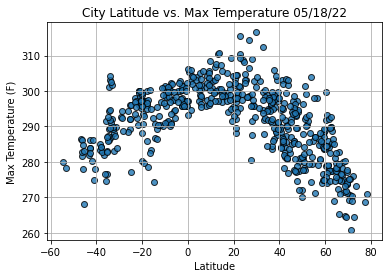

In [49]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lat, MaxTemp,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

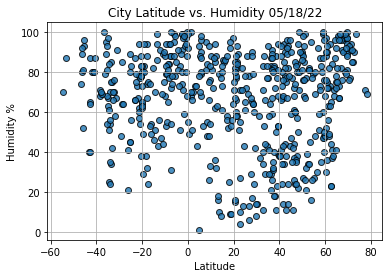

In [51]:
# Build the scatter plot for latitude vs. Humidity.

plt.scatter(lat, humidity,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

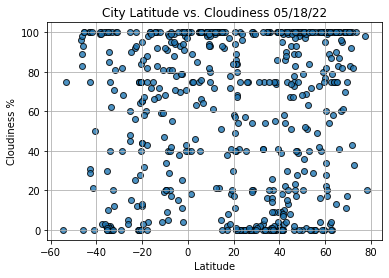

In [52]:
# Build the scatter plot for latitude vs. Cloudiness.

plt.scatter(lat, cloudiness,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

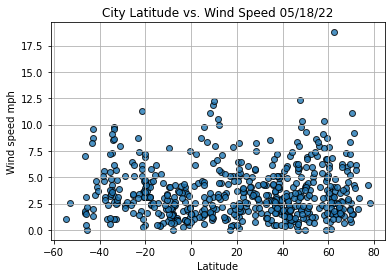

In [54]:
# Build the scatter plot for latitude vs. Wind Speed.

plt.scatter(lat, windspeed,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()